In [1]:
import numpy as np
from Code.pde_solver import PDE_Solver
from Code.bs_solver import BlackScholes_Solver

In [10]:
def g(s):
    return np.maximum(s-1,0)

In [60]:
gamma = 0.2
r = 0.03
T_prime=5
t = 0
T = T_prime-t
a_x = 0.5
exp_a_x = np.e ** a_x


sigma = 0.5 * (gamma**2)

f = lambda x : np.exp( 1. / (gamma**2) * (r - (0.5) * gamma ** 2) * x ) * g(np.exp(x))
V = lambda x,t : r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2

print "sigma = ", sigma
print "V = ", r + 0.5 / (gamma**2) * (r - (0.5) * gamma ** 2) ** 2
print "T = ", T_prime-t

sigma =  0.02
V =  0.03125
T =  5


In [61]:
pde = PDE_Solver(sigma=sigma, V=V, f=f, T=T, n=20, a_x=a_x, M=100)
pde.Solve()

In [62]:
pde.u

array([ 0.03915151,  0.04101937,  0.04296159,  0.04498039,  0.04707805,
        0.04925686,  0.05151913,  0.05386725,  0.0563036 ,  0.05883061,
        0.06145074,  0.06416647,  0.06698031,  0.06989482,  0.07291255,
        0.07603611,  0.07926811,  0.08261121,  0.08606806,  0.08964135,
        0.09333381,  0.09714815,  0.10108712,  0.10515348,  0.10935003,
        0.11367955,  0.11814485,  0.12274876,  0.12749412,  0.13238376,
        0.13742054,  0.14260732,  0.14794698,  0.15344238,  0.15909642,
        0.16491197,  0.17089193,  0.17703919,  0.18335663,  0.18984716,
        0.19651365,  0.20335902,  0.21038613,  0.21759789,  0.22499716,
        0.23258684,  0.2403698 ,  0.2483489 ,  0.25652701,  0.26490699,
        0.27349168,  0.28228395,  0.29128661,  0.30050251,  0.30993447,
        0.3195853 ,  0.32945783,  0.33955484,  0.34987914,  0.36043352,
        0.37122076,  0.38224365,  0.39350494,  0.40500742,  0.41675384,
        0.42874697,  0.44098955,  0.45348435,  0.46623412,  0.47

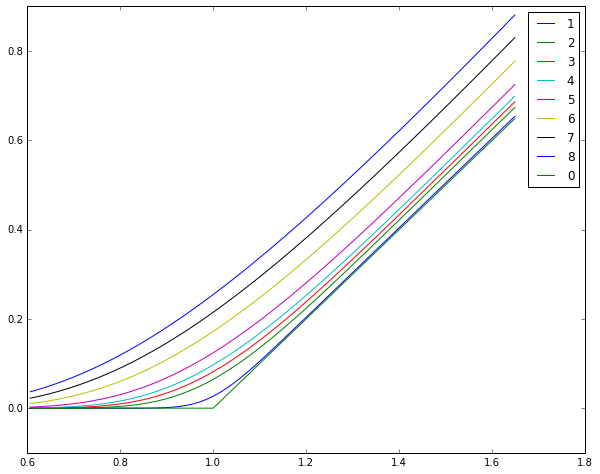

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8))

t_variants = [0.98, 0.9, 0.85, 0.8, 0.7, 0.5, 0.3, 0.1]
labels = [str(i) for i in xrange(1, len(t_variants)+1)] + ['0']
for i in xrange(len(t_variants)):
    bs = BlackScholes_Solver(gamma=gamma, r=r, g=g, T_prime=T_prime, t=t_variants[i]*T_prime, n=20, exp_a_x=exp_a_x, M=100)
    bs.Solve()
    plt.plot(bs.s, bs.c, label=labels[i])
plt.plot(bs.s, g(bs.s), label = labels[-1])
plt.legend()
plt.show()